<a href="https://colab.research.google.com/github/prosto31/dap-2024/blob/main/les07/%D0%9B%D1%807_%D0%9A%D0%BE%D0%B2%D0%B0%D0%BB%D0%B5%D0%BD%D0%BA%D0%BE_12002208.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №7. Классификация

по дисциплине "Анализ данных на Python".<br>
студента очного отделения<br>
3 курса 12002209 группы<br>
Коваленко Денис Дмитриевич.
<br><br>
Проверил<br>
Чеботарев Сергей Александрович<br><br>

Выполните следующие задания:

1. Откройте в файл в Google Colab (используйте собственный форк репозитория).
2. Решите задачи.
3. Сохраните результат в виде файла rep.ipynb в ваш репозиторий github в директорию ./les07
4. Создайте pull request в репозиторий https://github.com/chebotarevsa/dap-2024. Название pull request должно иметь формат "<Номер лабораторной работы>  <Номер группы> <ФИО>"
5. Сдайте работу в системе "Пегас", в отчет укажите ссылку на pull request

Используя набор данных titanic.csv постройте модель предсказывающую выжил или погиб пассажир.
1.	PassengerId – Идентификатор пассажира (уникальный номер для каждого пассажира).
2.	Survived – Выжил (0 – не выжил, 1 – выжил).
3.	Pclass – Класс пассажира (1 – первый класс, 2 – второй класс, 3 – третий класс).
4.	Name – Имя (полное имя пассажира).
5.	Sex – Пол (male – мужчина, female – женщина).
6.	Age – Возраст (числовое значение, может быть дробным).
7.	SibSp – Количество родственников на борту (братьев, сестер или супругов).
8.	Parch – Количество родителей или детей на борту.
9.	Ticket – Номер билета.
10.	Fare – Стоимость билета (в фунтах стерлингов).
11.	Cabin – Номер каюты (может быть пропущен, если данные отсутствуют).
12.	Embarked – Порт посадки (C – Cherbourg, Q – Queenstown, S – Southampton).

In [ ]:
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
print(f"Python version: {sys.version}")
print(f"Numpy version: {np.version.version}")
print(f"Pandas version: {pd.__version__}")
print(f"Matplotlib version: {mpl.__version__}")

Python version: 3.10.12 (main, Nov  6 2024, 20:22:13) [GCC 11.4.0]
Numpy version: 1.26.4
Pandas version: 2.2.2
Matplotlib version: 3.8.0


## Извлечение данных

1. Создайте DataFarame из файла titanic.csv, в качестве индекса используйте столбец "PassengerId".

In [ ]:
titanic_df = pd.read_csv('titanic.csv',index_col="PassengerId")
titanic_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


2. Выведете первые 7 строк набора.

In [ ]:
titanic_df.head(7)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


### Подготовка данных

3. Выведете информацию о типах данных в наборе. Имеются ли в наборе не числовые признаки? Имеются ли в наборе данные имеющие значение null?
    

In [ ]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


4. Удалите не числовые признаки, которые по вашему мнению, не могут влиять на заначение выжил или погиб пассажир.

In [ ]:
titanic_df=titanic_df[["Survived","Pclass","Sex","Age","SibSp","Parch","Fare"]]
titanic_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,,
1,0,3,male,22.0,1,0,7.2500
2,1,1,female,38.0,1,0,71.2833
3,1,3,female,26.0,0,0,7.9250
4,1,1,female,35.0,1,0,53.1000
5,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000
888,1,1,female,19.0,0,0,30.0000
889,0,3,female,NaN,1,2,23.4500


5. Вместо признака "Sex" (я надеюсь вы его не удалили 😂) Создайте два новых признака male и female которые содержат значения 0 или 1.

In [ ]:
titanic_df = pd.get_dummies(titanic_df, columns=['Sex']).astype('float64')
titanic_df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
PassengerId,,,,,,,,
1,0.0,3.0,22.0,1.0,0.0,7.2500,0.0,1.0
2,1.0,1.0,38.0,1.0,0.0,71.2833,1.0,0.0
3,1.0,3.0,26.0,0.0,0.0,7.9250,1.0,0.0
4,1.0,1.0,35.0,1.0,0.0,53.1000,1.0,0.0
5,0.0,3.0,35.0,0.0,0.0,8.0500,0.0,1.0
...,...,...,...,...,...,...,...,...
887,0.0,2.0,27.0,0.0,0.0,13.0000,0.0,1.0
888,1.0,1.0,19.0,0.0,0.0,30.0000,1.0,0.0
889,0.0,3.0,NaN,1.0,2.0,23.4500,1.0,0.0


6. Удалите строки, которые содержать хотя бы одно null значение.

In [ ]:
titanic_df.isnull().sum()
titanic_df=titanic_df.dropna()
#titanic_df=titanic_df[titanic_df['Age'].notnull()]
titanic_df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
PassengerId,,,,,,,,
1,0.0,3.0,22.0,1.0,0.0,7.2500,0.0,1.0
2,1.0,1.0,38.0,1.0,0.0,71.2833,1.0,0.0
3,1.0,3.0,26.0,0.0,0.0,7.9250,1.0,0.0
4,1.0,1.0,35.0,1.0,0.0,53.1000,1.0,0.0
5,0.0,3.0,35.0,0.0,0.0,8.0500,0.0,1.0
...,...,...,...,...,...,...,...,...
886,0.0,3.0,39.0,0.0,5.0,29.1250,1.0,0.0
887,0.0,2.0,27.0,0.0,0.0,13.0000,0.0,1.0
888,1.0,1.0,19.0,0.0,0.0,30.0000,1.0,0.0


## Исследование данных

4. Нормализуйте значения признака "Fare".

In [ ]:
titanic_fare=titanic_df[["Fare","Age"]]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(titanic_fare)
titanic_fare=pd.DataFrame(scaled_data,columns=["Fare","Age"],index=titanic_df.index)
titanic_df=titanic_df[["Survived","Pclass","SibSp","Parch","Sex_female","Sex_male"]].join(titanic_fare)
titanic_df

,Survived,Pclass,SibSp,Parch,Sex_female,Sex_male,Fare,Age
PassengerId,,,,,,,,
1,0.0,3.0,1.0,0.0,0.0,1.0,-0.518978,-0.530377
2,1.0,1.0,1.0,0.0,1.0,0.0,0.691897,0.571831
3,1.0,3.0,0.0,0.0,1.0,0.0,-0.506214,-0.254825
4,1.0,1.0,1.0,0.0,1.0,0.0,0.348049,0.365167
5,0.0,3.0,0.0,0.0,0.0,1.0,-0.503850,0.365167
...,...,...,...,...,...,...,...,...
886,0.0,3.0,0.0,5.0,1.0,0.0,-0.105320,0.640719
887,0.0,2.0,0.0,0.0,0.0,1.0,-0.410245,-0.185937
888,1.0,1.0,0.0,0.0,1.0,0.0,-0.088774,-0.737041


5. Найдите разницу между средними значениями признака "Fare" для погибших и выживших пассажиров.

In [ ]:
data = titanic_df.groupby('Survived').mean().T.loc["Fare"]
data

,Fare
Survived,
0.0,-0.221797
1.0,0.324283


6. Простройте на одной оси координат гистограмы значений признака "Fare" для погибших и выживших пассажиров.

Text(0.5, 1.0, 'Распределение Fare')

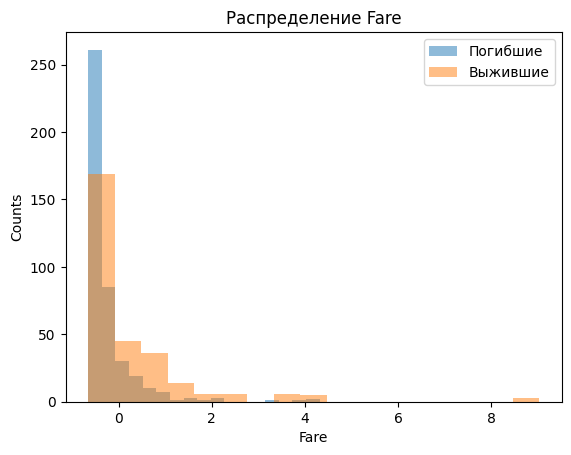

In [ ]:
bins = 17
plt.hist(titanic_df.loc[titanic_df['Survived']==0, 'Fare'], bins=bins, alpha=0.5, label='Погибшие')
plt.hist(titanic_df.loc[titanic_df['Survived']==1, 'Fare'], bins=bins, alpha=0.5, label='Выжившие')
plt.legend(loc='upper right')
plt.xlabel( 'Fare')
plt.ylabel( 'Counts')
plt.title('Распределение Fare')

7. Сформируйте набор признаков (X). Сформируйте вектор целевых значений (y).

In [ ]:
X = titanic_df[["Pclass","SibSp","Parch","Sex_female","Sex_male","Age","Fare"]]
y = titanic_df["Survived"]
print(X,y)

             Pclass  SibSp  Parch  Sex_female  Sex_male       Age      Fare
PassengerId                                                                
1               3.0    1.0    0.0         0.0       1.0 -0.530377 -0.518978
2               1.0    1.0    0.0         1.0       0.0  0.571831  0.691897
3               3.0    0.0    0.0         1.0       0.0 -0.254825 -0.506214
4               1.0    1.0    0.0         1.0       0.0  0.365167  0.348049
5               3.0    0.0    0.0         0.0       1.0  0.365167 -0.503850
...             ...    ...    ...         ...       ...       ...       ...
886             3.0    0.0    5.0         1.0       0.0  0.640719 -0.105320
887             2.0    0.0    0.0         0.0       1.0 -0.185937 -0.410245
888             1.0    0.0    0.0         1.0       0.0 -0.737041 -0.088774
890             1.0    0.0    0.0         0.0       1.0 -0.254825 -0.088774
891             3.0    0.0    0.0         0.0       1.0  0.158503 -0.509523

[714 rows x

## Предсказательная модель

8. Разделите набор данных на два, одни для обучения модели другой для проверки. Тестовый набор должен содержать 25 процентов данных.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test= train_test_split(X,y,train_size=0.75)

print(len(X_train),len(X_test))

535 179


9. Выполните обучение модели.

In [ ]:
#from sklearn.neighbors import KNeighborsClassifier
#model = KNeighborsClassifier(n_neighbors=4, algorithm='auto')
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(X_train,y_train)

LogisticRegression()

## Проверка модели

10. Выведите мартицу ошибок

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
model_matrix = confusion_matrix(y_test, y_pred, labels=[0,1])
model_matrix_df = pd.DataFrame(model_matrix)
model_matrix_df

,0,1
0,93,13
1,21,52


11. Расчитайте accuracy

In [ ]:
from sklearn.metrics import accuracy_score
model_accuracy = accuracy_score(y_test, y_pred)
round(model_accuracy,2)

0.81

12. <i>Сделайте вывод о полученном результате:</i> Чем грубее модель для данного набора данных, тем точнее результат.

Вывод:

## Вопросы для защиты

1. Сформулируйте задачу классификации.
2. Перечислите типы классификации.
3. В чем особенность несбалансированной классификации?
4. В чем особенность мультиклассовой классификации?
5. В чем особенность бинарной классификации?
6. В чем особенность классификации по нескольким меткам?
7. Чем стратегия "Один против всех" отличается от стратегии "Один против одного"?
8. Что такое матрица ошибок (несоответствий)?
9. Как рассчитывается Accuracy?
10. Объясните алгоритм классификации K-ближайших соседей.